<div align="right">
  <img src="https://drive.google.com/uc?export=view&id=1J8JpP65HsHXdpJvhb_sMwn3yROyU832m" height="80" width="200" style="float: right;">
</div>
<h1><b>Data Science and Machine Learning</b></h1>
<h2><b>Clase 9</b>: Test de hipótesis</h2>
<h3><b>Docente</b>: <a href="https://www.linkedin.com/in/danielablanco/">Daniela Blanco</a>

# Contenido

- [1. Estadística descriptiva vs inferencial](#inferencial)
- [2. Contraste de hipótesis](#contraste)
- [3. Contraste de hipótesis para la media](#media)
- [4. Contraste de hipótesis para la proporción](#proporcion)
- [5. Otras técnicas](#otras)
- [6. Links de interés](#links)


In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

## 1. Estadística descriptiva vs inferencial

<img src="https://drive.google.com/uc?export=view&id=1tkvo46NiHodOqfJOL5wmVQ49jAB_UBU1" height="180" width="400" style="float: center;">

La **estadística descriptiva** se utiliza para resumir o describir los datos de una muestra.

La **estadística inferencial** permite hacer generalizaciones o predicciones sobre una población completa basándose en una muestra representativa.

Vamos a denominar de distinta manera los indicadores correspondientes a la población y a la muestra.

### Estimadores y parámetros

Un **parámetro** es una medida que describe una característica de toda la **población** (como la media).

Un **estimador** es una medida basada en una **muestra** que se usa para aproximar un parámetro.

Este tipo de relación es clave, ya que, en la mayoría de los casos, no podemos obtener datos de toda la población, pero sí podemos calcular un estimador a partir de una muestra.

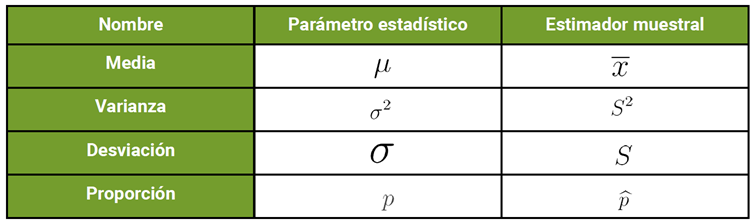

**Ejemplos**:

- Parámetro: El ingreso promedio μ de todos los trabajadores de un país.

- Estimador: El ingreso promedio de una muestra x̄ de 1,000 trabajadores, que se utiliza para estimar el ingreso promedio de todos los trabajadores del país.

## 2. Contraste de hipótesis <a name="contraste"></a>

- Una **hipótesis**, en estadística, es una afirmación respecto a alguna característica de una población.
- Realizar un **contraste de hipótesis** supone comparar las predicciones con la realidad que observamos (muestra).
- Es un proceso que nos permite decidir si aceptamos o rechazamos una hipótesis sobre la población, basándonos en los datos de la muestra.
- Si existe coincidencia (con cierto margen de error), entonces aceptamos la hipótesis. En caso contrario, la rechazaremos.

### Pasos para formular un contraste de hipótesis <a name="pasos"></a>

El contraste de hipótesis estructura el problema de forma que podamos usar evidencias estadísticas para probar estas afirmaciones y verificarlas. Los pasos que seguiremos serán:

1. **Definir** la hipótesis.

2. Elegir el **nivel de significación**.

3. **Verificar** la hipótesis.

4. **Decisión** Tomar una decisión e interpretar resultados.

### 2.1. Definir la hipótesis <a name="hipotesis"></a>

El contraste de hipótesis supondrá siempre una pregunta a la que estaremos buscando responder.

La formulación de la pregunta sigue una estructura concreta y se construye a través de dos elementos: la **hipótesis nula** ($H₀$) y la **hipótesis alternativa** ($H₁$).

- **Hipótesis nula** (H0): Es la afirmación que inicialmente se asume verdadera. Generalmente representa la situación sin cambio o sin efecto.

  Se asume que H0 es verdadera, de la misma manera que en un juicio se inicia bajo el supuesto de que un acusado es inocente. La muestra aleatoria proporciona la evidencia.

- **Hipótesis alternativa** (H1): Es la afirmación que se considera como una alternativa a la hipótesis nula. Generalmente propone un efecto o una diferencia.

Las hipótesis son siempre proposiciones sobre los parámetros de la población o distribución bajo estudio, no proposiciones sobre la muestra.

###**Ejemplos**

**Ejemplo 1**: Investigación Médica

Un investigador quiere determinar si un nuevo medicamento reduce el nivel promedio de azúcar en la sangre de los pacientes diabéticos más que el tratamiento estándar.

**Hipótesis Nula (H₀)**: El nuevo medicamento no reduce el nivel promedio de azúcar en la sangre más que el tratamiento estándar. (H₀: μ₀ = μ₁)

**Hipótesis Alternativa (H₁)**: El nuevo medicamento reduce el nivel promedio de azúcar en la sangre más que el tratamiento estándar. (H₁: μ₀ < μ₁)

**Ejemplo 2**: Estudios Ambientales

Un científico quiere verificar si la concentración promedio de un contaminante en un río ha cambiado después de la implementación de nuevas regulaciones ambientales.

**Hipótesis Nula (H₀)**: La concentración promedio del contaminante no ha cambiado después de las nuevas regulaciones. (H₀: μ₀ = μ₁)

**Hipótesis Alternativa (H₁)**: La concentración promedio del contaminante ha cambiado después de las nuevas regulaciones. (H₁: μ₀ ≠ μ₁)

**Ejemplo 3: Marketing**

Un analista de marketing desea saber si una nueva campaña publicitaria ha aumentado las ventas promedio diarias de un producto.

**Hipótesis Nula (H₀)**: La nueva campaña publicitaria no ha aumentado las ventas promedio diarias. (H₀: μ₀ = μ₁)

**Hipótesis Alternativa (H₁)**: La nueva campaña publicitaria ha aumentado las ventas promedio diarias. (H₁: μ₀ < μ₁)

**Ejemplo 4**: Educación

Un investigador educativo quiere saber si un nuevo método de enseñanza mejora las calificaciones promedio de los estudiantes en matemáticas.

**Hipótesis Nula (H₀)**: El nuevo método de enseñanza no mejora las calificaciones promedio en matemáticas. (H₀: μ₀ = μ₁)

**Hipótesis Alternativa (H₁)**: El nuevo método de enseñanza mejora las calificaciones promedio en matemáticas. (H₁: μ₀ < μ₁)

### 2.2. Elegir el nivel de significación <a name="significancia"></a>

El **nivel de significación** ($α$, alfa) hace referencia al **grado de error** que admitimos para **aceptar o rechazar la hipótesis**.

Es la probabilidad de cometer un error tipo I, que es rechazar la hipótesis nula cuando en realidad es cierta.

El nivel de significancia es un umbral que establecemos de antemano, comúnmente 0.05 (5%) o 0.01 (1%).

Un 𝛼 de 0.05 significa que aceptamos un 5% de riesgo de cometer este error.

Se puede hablar tambien de nivel de confianza. Es 1-α. Por ejemplo si quiero una confianza del 95% será usando α=0.05.

### 2.3. Verificar la hipótesis <a name="verificacion"></a>

- Antes de verificar la hipótesis debemos disponer de una **muestra más o menos significativa** de la población inicial. Esto es lo más importante del contraste de hipótesis.

- Debemos elegir el **estadístico de prueba** adecuado para este contraste de hipótesis.

  El estadístico de prueba compara lo que hemos observado en nuestros datos con lo que se esperaría si la hipótesis nula fuese cierta.

  Es una variable aleatoria de distribución conocida (por ejemplo, normal o t de Student), lo que facilita la comparación de los resultados de la muestra con lo que se espera bajo la hipótesis nula.

  Existen diferentes estadísticos dependiendo del tipo de prueba (t-test, z-test, χ²).

- Calcular el valor del estadístico a partir de los datos de la muestra. Esto se usará para decidir si se rechaza o no la hipótesis nula.
  
- Calcular el **valor p**. Es la probabilidad de obtener los resultados de tu experimento si la hipótesis nula fuera cierta.

  Si el p-valor es muy pequeño, significa que es muy poco probable obtener esos resultados si la hipótesis nula es cierta.
  
  Por lo tanto, concluimos que los resultados son significativos y rechazamos la hipótesis nula. En cambio, si el p-valor es grande, no podemos rechazar la hipótesis nula.


### 2.3. Tomar una decisión e interpretar resultados

**Intervalo de confianza**

Un intervalo de confianza es un rango de valores que se utiliza para estimar un parámetro poblacional.

Es un rango de valores que probablemente contiene el parámetro poblacional con una cierta probabilidad (comúnmente 90%, 95% o 99%).

Por ejemplo, un intervalo de confianza del 95% indica que, si se repitieran los muestreos múltiples veces, el 95% de los intervalos construidos contendrían el verdadero parámetro poblacional.

- Ejemplo alturas:

Si en una encuesta sobre la altura de los estudiantes obtienes un intervalo de confianza del 95% entre 1,70 m y 1,80 m, significa que estás un 95% seguro de que la verdadera altura promedio de la población está entre esos valores.

- Ejemplo tiempo uso aplicación

Si estás midiendo el tiempo promedio de uso de una aplicación y obtienes un intervalo de confianza de 99% que va de 15 a 20 minutos, puedes afirmar que con un 99% de confianza, el tiempo promedio de uso está dentro de ese rango.

**Región crítica**

La región crítica es el conjunto de valores que llevaría al rechazo de la hipótesis nula.

Dependiendo del nivel de significancia y la naturaleza del test (unilateral o bilateral), se definen los límites de la región crítica.

Si se trazara la distribución del estadístico de prueba, la región crítica se establecería en la cola (o colas) donde se encontrarían los valores que llevarían a rechazar H0.

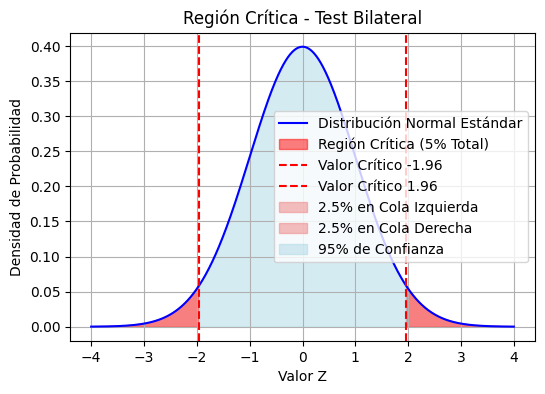

In [2]:
alpha = 0.05  # Nivel de significancia
mean = 0  # Media de la distribución normal
std_dev = 1  # Desviación estándar
z_critical = stats.norm.ppf(1 - alpha/2)  # Valor crítico para un test bilateral

# Valores para la distribución normal
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, mean, std_dev)

# Crear la figura y los ejes
plt.figure(figsize=(6, 4))
plt.plot(x, y, label='Distribución Normal Estándar', color='blue')

# Rellenar la región crítica
plt.fill_between(x, y, where=(x <= -z_critical) | (x >= z_critical), color='red', alpha=0.5, label='Región Crítica (5% Total)')

# Líneas de los valores críticos
plt.axvline(-z_critical, color='red', linestyle='--', label=f'Valor Crítico -{z_critical:.2f}')
plt.axvline(z_critical, color='red', linestyle='--', label=f'Valor Crítico {z_critical:.2f}')

# Marcar el 2.5% en cada cola
plt.fill_between(x, y, where=(x <= -z_critical), color='lightcoral', alpha=0.5, label='2.5% en Cola Izquierda')
plt.fill_between(x, y, where=(x >= z_critical), color='lightcoral', alpha=0.5, label='2.5% en Cola Derecha')

# Marcar el 95%
plt.fill_between(x, y, where=(x > -z_critical) & (x < z_critical), color='lightblue', alpha=0.5, label='95% de Confianza')

# Configurar el gráfico
plt.title('Región Crítica - Test Bilateral')
plt.xlabel('Valor Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid()
plt.show()


En pruebas de dos colas, rechazas 𝐻0 si el estadístico cae en cualquiera de las dos colas extremas. Es decir es mayor al límite superior o inferior al límite inferior.

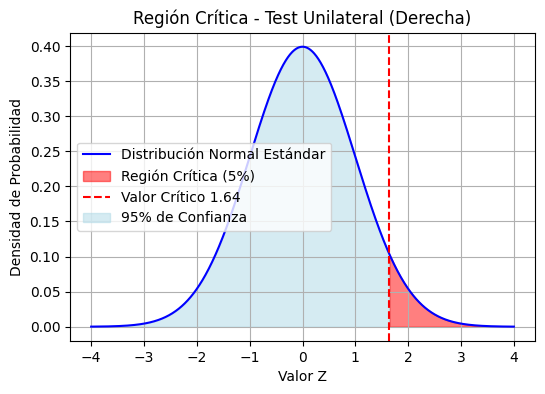

In [3]:
alpha = 0.05  # Nivel de significancia
mean = 0  # Media de la distribución normal
std_dev = 1  # Desviación estándar
z_critical = stats.norm.ppf(1 - alpha)  # Valor crítico para un test unilateral

# Valores para la distribución normal
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, mean, std_dev)

# Crear la figura y los ejes
plt.figure(figsize=(6, 4))
plt.plot(x, y, label='Distribución Normal Estándar', color='blue')

# Rellenar la región crítica
plt.fill_between(x, y, where=(x >= z_critical), color='red', alpha=0.5, label='Región Crítica (5%)')

# Línea del valor crítico
plt.axvline(z_critical, color='red', linestyle='--', label=f'Valor Crítico {z_critical:.2f}')

# Marcar el 5%
plt.fill_between(x, y, where=(x < z_critical), color='lightblue', alpha=0.5, label='95% de Confianza')

# Configurar el gráfico
plt.title('Región Crítica - Test Unilateral (Derecha)')
plt.xlabel('Valor Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid()
plt.show()

Si el valor del estadístico de prueba es mayor que el valor crítico mayor (en una prueba de cola superior), rechazas 𝐻0.

Para una prueba de cola inferior, rechazas 𝐻0 si el estadístico es menor que el valor crítico inferior.

**Analizando el p-value:**

  - Si 𝑝-value ≤ α: Rechazamos la hipótesis nula.

  Esto significa que los datos proporcionan suficiente evidencia para aceptar la hipótesis alternativa.

  - Si 𝑝 > 𝛼: No se rechaza la hipótesis nula.

  Esto no significa que 𝐻0 sea cierta, sino que no hay evidencia suficiente para rechazarla.

#### Ejemplo 1: Peso roedores

Supongamos que queremos evaluar si el peso promedio de los ratones es de 500 gramos, con una desviación estándar de 5 gramos.

Obtenemos una muestra de 100 ratones, y se obtiene una media muestral de 496,8 gramos.

**1. Definir la hipótesis**

H0: El peso promedio de los ratones es de 500 gramos.

$$ H_0: \mu = 500$$

H1: El peso promedio de los ratones es diferente de 500 gramos (bilateral).

$$ H_1: \mu \neq 500$$

Alternativa: H1: El peso promedio de los ratones es diferente de 500 gramos.

**2. Elegir el nivel de significación**

Nivel de significancia de α = 0.05

Comúnmente se usa un nivel de significancia de 0.05 (5%). Esto significa que estamos dispuestos a rechazar la hipótesis nula en un 5% de los casos cuando en realidad es verdadera.

**3. Elegir y calcular el estadístico de prueba.**

Utilizaremos el estadístico Z para una media muestral. La fórmula es:

$$ Z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}}$$

Donde:
1. x̄ = media muestral = 496.8 gramos
2. μ = media poblacional bajo H0 = 500 gramos
3. σ = desviación estándar = 5 gramos
4. n = tamaño de la muestra = 100

$$
Z = \frac{496.8 - 500}{5 / \sqrt{100}} = \frac{-3.2}{0.5} = -6.4
$$

**4. Determinar la región crítica y calcular p-value**

Para un test bilateral con α = 0.05, los valores críticos son:

$$
Z_{crítico} = \pm Z_{\alpha/2} = \pm Z_{0.025} \approx \pm 1.96
$$

La región crítica está definida como:

$$
Z < -1.96 \quad \text{o} \quad Z > 1.96
$$

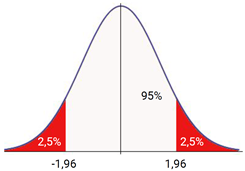

Se compara el valor obtenido del estadístico de prueba con los valores de la región crítica.

$$
Z = -6.4 < -1.96
$$

Dado que el estadístico de prueba cae en la región crítica, rechazamos la hipótesis nula. Acepta H1.

Con base en los resultados, hay suficiente evidencia para concluir que el peso promedio de los ratones no es 500 gramos.

Otra forma es con el p-valor:

Para un test bilateral, el p-valor se calcula como:

$$
p\text{-valor} = 2 \cdot P(Z < z)
$$

Es la función de distribución acumulativa (CDF) de la distribución normal estándar para el valor \( z \), que es el estadístico de prueba calculado.

El p-valor es: 0.0000000002

Como el p-valor es mucho menor que el nivel de significancia 𝛼=0.05, rechazamos la hipótesis nula y concluimos que hay suficiente evidencia para afirmar que el peso promedio de los ratones no es 500 gramos.

#### Ejemplo 2: Moneda justa

Supongamos que estamos evaluando si una moneda es justa, es decir, si la probabilidad de obtener cara (p) es 0.50.

Realizamos un experimento lanzando la moneda 100 veces y obtenemos 60 caras.

1. Formular las Hipótesis:

- $ H_0 $: $ p = 0.50 $ (La moneda es justa).
- $ H_1 $: $ p \neq 0.50 $ (La moneda no es justa).

2. Calcular el Estadístico de Prueba (Z):

- Proporción muestral $\hat{p}$ = 60/100 = 0.60

- Estadístico Z:

$$
Z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1 - p_0)}{n}}} = \frac{0.60 - 0.50}{\sqrt{\frac{0.50 \times 0.50}{100}}} = 2.00
$$

3. Encontrar el Valor p:

- Para un $ Z = 2.00 $, el valor p (bilateral) se puede encontrar usando tablas de la distribución normal estándar o software estadístico.

- $ P(Z \geq 2.00) \approx 0.0228 $ por un lado, y lo mismo por el otro lado.

- Valor p = $ 2 \times 0.0228 = 0.0456 $

- Si $ \alpha = 0.05 $, entonces $ 0.0456 < 0.05 $

Dado que el valor p es menor que α, se rechaza la hipótesis nula.

Concluimos que hay suficiente evidencia para afirmar que la moneda no es justa.


#### Ejemplo 3: Alturas

Supongamos que estamos investigando si la altura promedio de los estudiantes de una universidad es diferente de 170 cm.

Tomamos una muestra aleatoria de 30 estudiantes:
  - media de la muestra $\bar{x}$ es 172 cm y
  - la desviación estándar de la muestra $s$ es 6 cm

**1. Formular las Hipótesis:**

- $ H_0 $: La altura promedio de los estudiantes es 170 cm ($ \mu = 170 $).
- $ H_1 $: La altura promedio de los estudiantes no es 170 cm ($\mu \neq 170 $).

**2. Seleccionamos el Nivel de Significancia**

- $ \alpha = 0.05 $

**3. Elegimos el Estadístico de Prueba:**

Usaremos una prueba t para una muestra.

**4. Recogemos Datos y Calculamos el Estadístico de Prueba:**

- Calculamos el estadístico t usando la fórmula:

$$
t = \frac{\bar{x} - \mu}{s / \sqrt{n}}
$$

Donde:
  
  - $\bar{x}$ es la media de la muestra.
  - $\mu$ es la media hipotética (170 cm en este caso).
  - $$ es la desviación estándar de la muestra.
  - $n4 es el tamaño de la muestra (30).

$$
t = \frac{172 - 170}{6 / \sqrt{30}} \approx 1.825
$$

**5. Determinar el Valor P:**

Usamos una tabla de distribución t o software estadístico para encontrar el valor p asociado con $t = 1.825$ y 29 grados de libertad (n-1) el valor p obtenido es 0.077.

**¿Acepto o rechazo?**

Como p= 0.077 > 0.05, no rechazamos la hipótesis nula (H₀).

No hay suficiente evidencia para afirmar que la altura promedio de los estudiantes de la universidad es diferente de 170 cm.


#### Otro ejemplo detallado en [video](https://www.youtube.com/watch?v=pj7pvXqTo7M).

## 3. Contraste de hipótesis para la media <a name="media"></a>

Este caso es uno de los más sencillos, el de comparación de dos medias, la muestra y la de la población.

Para compararlas, necesitamos previamente conocer la media y la desviación estándar de la población (nos vendrá dado porque estamos hipotetizando). La fórmula que caracteriza este cálculo es:

$$ Z = {{\overline{x} - \mu} \over {{\sigma} \over {\sqrt{n}}}} $$

Donde $\overline{x}$ y $\sigma$ son la media y la desviación estándar de la población, $\mu$ es la media que calcularemos de la muestra y $n$ es el tamaño de la muestra.

## 4. Contraste de hipótesis para la proporción <a name="proporcion"></a>

Este caso es uno de los más sencillos, el de comparación de dos proporciones, la muestra y la de la población.

Para compararlas, necesitamos previamente conocer la proporción de la población (nos vendrá dado porque estamos hipotetizando). La fórmula que caracteriza este cálculo es:

$$ Z = {{\hat{p} - p} \over {\sqrt{{p(1-p)} \over {n}}}} $$

donde $p$ es la proporción propuesta, de la población, $\hat{p}$ es la proporción que calcularemos de la muestra, $n$ es el tamaño de la muestra y la raíz cuadrada incluyendo lo de dentro es la desviación estándar de la proporción.

## 5. Otras técnicas <a name="otras"></a>

- **T-Test**: Permite comparar dos grupos o categorías numéricas con un tamaño muestral reducido. Este caso es el contraste de hipótesis para la media en el caso de que se desconozca la varianza con muestra reducida. Sin embargo, también se puede usar cuando se conoce.
- **Z-Test**: Permite comparar dos grupos o categorías numéricas con un tamaño muestral amplio. Este caso es el contraste de hipótesis para la media en el caso de que se desconozca la varianza con muestra amplia. Sin embargo, también se puede usar cuando se conoce.
- **ANOVA Test**: Permite comparar dos o más grupos o categorías numéricas.
- **Chi-Cuadrado Test**: Analiza la relación entre dos variables categóricas.
- **Correlation Test**: Analiza la relación entre dos variables numéricas.

![Diagrama de Contrastes de Hipótesis](https://github.com/4GeeksAcademy/machine-learning-content/blob/master/assets/contrast_advanced.png?raw=true)

Información más detallada: https://towardsdatascience.com/an-interactive-guide-to-hypothesis-testing-in-python-979f4d62d85

## 6. Links de interés <a name="links"></a>

[Prueba de Hipótesis Estadística: una explicación desde cero](https://probafacil.com/prueba-de-hipotesis-estadistica/)

[¿CÓMO ENCONTRAR LA PRUEBA DE HIPÓTESIS QUE BUSCAS?](https://www.maximaformacion.es/blog-dat/guia-para-encontrar-tu-prueba-estadistica/)